# Getting to learn how to use a notebook by running it ?

## Let's start by studying markdown cells

Try to <span style="color:red">**DOUBLE CLICK**</span> or type <span style="color:red">**ENTER**</span> on this cell to unconver the magic !

This cell is a **markdown** cell. They are used to display text and organise your notebook a bit. Markdown is a simplistic textual language used to write on the web.

--- 

### Why would you use a Jupyter notebook anyway ?

* It makes the code easier to follow and more shareable
* You can organize it better, making sections.
* The plots you make are kept after you've runned the cells : show a story.
* Every cell can be run independently : you can make quick tests within your code.
* JupyterLab is a nice platform : connected to github and allows you to avoid to use command line in a HPC cluster.
* People that read your articles can try to reproduce your results : this is science !


---

If you want a detailed explanation of all the markdown command you may want to use, check this <span style="color:blue">[cheat sheet](https://www.markdownguide.org/cheat-sheet/)</span>.

This tutorial notebook is highly inspired by the tutorial done by the <span style="color:blue">[CodeRefinery project](https://coderefinery.github.io/jupyter/)</span>

Once you're done studying the cell you can just run it and go forward by pressing <span style="color:red">**SHIFT+ENTER**</span>.

### Yes but how do I make my own cells ?

Try to click on the <span style="color:red">**+**</span> sign on the top lefthand corner of this jupyter code. It's right under the *test-notebook.ipynb* name. You can also press <span style="color:red">**B**</span>. Be sure that you're not writing in a cell though, to enter **command mode** type <span style="color:red">**ESC**</span>. To be sure it appears right below, click on this cell **one time**.

Good you've made a cell ! By default it's a code cell, you can change the type of a cell by clicking on it and type <span style="color:RoyalBlue">**M**</span> to turn it into a <span style="color:RoyalBlue">**markdown**</span> cell and <span style="color:darkorange">**Y**</span> to turn it into a <span style="color:darkorange">**code**</span> cell.

Try to write **print('hello world')** and execute the cell right above this one.

## You're boring me te death, I want to code and publish in Nature !

### Alright...let's look at how organizing your code cells

But how should you organize your code ? Well, you want it to be readable. Let's dwell on this small example. I have downloaded the <span style="color:Crimson">**daily historical surface temperature**</span> data simulated by the <span style="color:darkorange">**IPSL_CM6A_LR model**</span> over the <span style="color:DarkSlateBlue">**1970-2014 period**</span>. I would love you to try to make a plot to show that global warming might be a thing. Let's try together shall we ?

First of all, you should **describe what you're doing in your notebook** which I just did. Isn't that nice ?

## Initialisation of the code

This part is about everything boring you need to do to start actually showing plots and computing things you want to show. For example here we need to **import the necessary libraries** and **open the data stored on the platform**. To run the command lines, you can keep pressing  <span style="color:red">**SHIFT+ENTER**</span>.

### Importation of the needed libraries 

In [1]:
# ================ IMPORTATIONS ================ #

### DATA MANIPULATION ###

import xarray as xr # used to manipulate multidimensionnal data into the xarray format

import numpy as np # useful to handle matrix like datasets

import scipy.stats as stat # useful to do linear regressions

### DATA REPRESENTATION ###

import matplotlib.pyplot as plt # used for makings nice plots

print("Good you've imported the necessary libraries.")

Good you've imported the necessary libraries.


### Open the data with xarray

Xarray is a nice library allowing us to read netcdf files. These files are everywhere in climate modelling outputs so you better get familiar with them.\

We wish to open a file called *surface_temperature_historical_1970_2014_IPSL_CM6A_LR.nc*. It is is located in the **shared storage** space, more precisely in **/shared-storage/test-notebook/data-test-notebook/**. Beware that it's always more convenient, in order to avoid mistakes, to use **the absolute path of a file** and not its **relative path to your notebook**. Let's define it :

In [2]:
absolute_path = "/mnt/data-summer-shared/test-notebook/data-test-notebook/surface_temperature_historical_1970_2014_IPSL_CM6A_LR.nc"

print("You've set the path, good job")

You've set the path, good job


Do you want to find it yourself ? You could try to use some command lines and the folder system of Jupyterlab. Try to go into the **data-test-notebook** folder through the **folder navigator** on the left of this jupyter notebook. Then click on the <span style="color:red">**+**</span> sign at the right of the name of this notebook (*test-notebook.ipynb*). This will open a panel with lot of choices. What you care about is opening a terminal. Since you've selected through the **folder navigator** the folder you are interested in, the terminal will directly put you there. Then just type the bash command "**pwd**" (print working directory) and you will get the same path as I did, deprived of the name of the file.

Ok, you are all set to open the file with xarray, for now let's just consider the surface_temperature variable that is called *ts* in the xarray.

In [3]:
surface_temperature = xr.open_dataset(absolute_path).ts

surface_temperature

<xarray.DataArray 'ts' (time: 16436, lat: 143, lon: 144)> Size: 1GB
[338450112 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 572B -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 131kB 1970-01-01T12:00:00 ... 2014-12-31T1...
Attributes:
    long_name:           Surface Temperature
    units:               K
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 d
    standard_name:       surface_temperature
    description:         Surface temperature (skin for open ocean)
    history:             none
    cell_measures:       area: areacella

It holds a lot of information. What you need to understand is that we have opened an array defined on different coordinates **latitude**, **longitude** and **time**. If you click on **Attributes**, you can even have some more extra information. The attributes say it is a daily array but we can verify it with the next code cell.

In [4]:
surface_temperature.time[0:10].dt.day

<xarray.DataArray 'day' (time: 10)> Size: 80B
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
Coordinates:
  * time     (time) datetime64[ns] 80B 1970-01-01T12:00:00 ... 1970-01-10T12:...
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1850-01-01 00:00:00
    bounds:         time_bounds

As you can see, the first ten **time** coordinates correspond to the ten first days of 1970.

### That's the end of the initialisation part of this notebook

In this part, we have managed to import the libraries we need and extract the data. It is important as any user that would like to replicate what we've done and that has access to this platform will be able to know where to look for and what libraries he needs.

## It is cool and all but I would like to prove global warming : Computation part

Not so fast. Would'nt you love make some computations ? We have the temperature defined for every grid cell but global warming is **GLOBAL** right ? Let's make an average over the whole planet. And for that, what is better than a function ? Let's define it and **do not dwell on the details** I just want to illustrate that once it is defined I can use it in the following cells.

### Define the right variable to use

For this computation I am going to need another variable that is held within the netcdf file : **areacella**. This variable represents the area that is associated with a grid point at a given latitude and longitude. Maybe you've never thought about that but if you have a regular grid of fixed steps in latitude and longitude, **a grid point in the North Pole will represent a smaller surface than a point at the Equator**. Just think about a 3D representation of the Earth.

In [5]:
areacella = xr.open_dataset(absolute_path).areacella

areacella.values # I can access the values of this xarray dataset with the .values

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [ 866.80717916,  866.80717916,  866.80717916, ...,  866.80717916,
         866.80717916,  866.80717916],
       [1733.18244242, 1733.18244242, 1733.18244242, ..., 1733.18244242,
        1733.18244242, 1733.18244242],
       ...,
       [1733.18244242, 1733.18244242, 1733.18244242, ..., 1733.18244242,
        1733.18244242, 1733.18244242],
       [ 866.80717916,  866.80717916,  866.80717916, ...,  866.80717916,
         866.80717916,  866.80717916],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

This is a numpy array. You don't need to think too much about it either. On the lines the latitude varies and on the columns it is the longitude. In reality, areacella only depends of the latitude, this is why on a fixed latitude you will always see the same values over the longitude. Let me show you :

In [6]:
print(areacella.values[:10,0])

print("\n Which corresponds to in latitude :")

surface_temperature.lat.isel(lat = np.arange(0,10)).values

[   0.          866.80717916 1733.18244242 2598.71401731 3462.96911214
 4325.5339109  5185.98131461 6043.8862678  6898.8374359  7750.407428  ]

 Which corresponds to in latitude :


array([-90.     , -88.73239, -87.46479, -86.19718, -84.92958, -83.66197,
       -82.39436, -81.12676, -79.85915, -78.59155], dtype=float32)

### Finally : we define a function

We define a function right there that will be used after. You can do it in a separate python .py file but it is also nice to show which methods you use in your notebook. Don't focus too much on the content : **it does what it says**.

In [7]:
def calc_global_temperature_mean(surface_temperature, areacella):
    """
    ### DEFINITION
    
    This function computes the weighted mean of the temperature over every grid cell point to produce a global temperature mean.
    
    ### INPUTS 
    
    SURFACE_TEMPERATURE : XARRAY DATAARRAY | data array holding the surface temperature

    AREACELLA : XARRAY DATAARRAY | data array that holds the areacella variable associated to the surface temperature's grid points
    
    ### OUTPUT
    
    GLOBAL_TEMPERATURE_MEAN_TIMESERIES : NUMPY ARRAY 1D | daily timeseries of the global mean temperatures
    """

    ### INTIIALISATION ###

    ## Generate the total area of the Earth ##

    total_area = np.sum(areacella.values)

    ## Generate the weight of each grid point to the total_area ##
    
    weights = areacella/total_area

    ### DO THE WEIGHTED MEAN ###

    ## Give weights to each grid point ##
    
    weighted_array = surface_temperature.weighted(weights)

    ## Compute the global spatial mean ##

    global_temperature_mean_timseries = weighted_array.sum(dim = ['lat','lon'], skipna = True)

    return global_temperature_mean_timseries

### Apply the function

Let's run the function, it is a bit long (like 10s). It is the occasion to introduce an internal function of the jupyter notebooks : **%%time**. It allows you to know how long it takes for a cell to run and may be pretty convenient to optimize your codes.

In [8]:
%%time

global_temperature_mean_timeseries = calc_global_temperature_mean(surface_temperature, areacella)

CPU times: user 8.99 s, sys: 2.16 s, total: 11.2 s
Wall time: 13 s


### We've done the computation


It has been a great occasion to show that one can define a function and use it right after, allowing for quick debugging and optimisation.

### I want to start an internship not listen to a stupid notebook : show some plots

Yeah it is hard work dear people. But before throwing your keyboard at me, let's demonstrate why Jupyter notebooks are sooo cool : **they integrate the plots you make directly within the notebook** !

### Display of the seasonal cycle of the year you were born

Did you never dreamed to know how was the seasonal cycle when you where born ? Now you can thanks to the following cells. Let's ask you, the user, to give us its birthday year.

In [ ]:
# ================ USER INPUT ================ #

### DEFINE YOUR BIRTH YEAR ###

birth_year = int(input("Tell me when you were born. I won't tell anyone :\n"))

### SAY IT BACK TO THE USER ###
print("So you were born in {} ?".format(birth_year))

Now that we know when you were born, we can plot the seasonal cycle of this given year. If you look at the code, you'll see that xarray makes plotting ridiculously simple. To make everything more readable, we will compute the temperature in **degrees celsius** and show the **monthly mean** insted of the full timeseries.

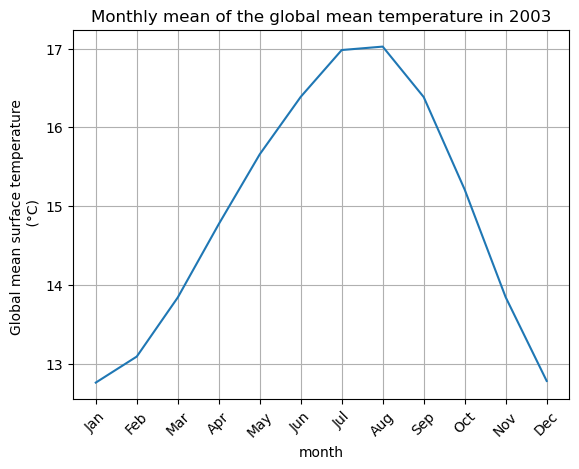

In [10]:
# ================ PLOT THE SEASONAL CYCLE OF YOUR BIRTH YEAR ================ #

### PREPARE THE DATA ###

## Extract the given year ##

surface_temperature_timeseries_for_given_year = global_temperature_mean_timeseries.sel(time = global_temperature_mean_timeseries.time.dt.year == birth_year)

## Compute the monthly mean ##

surface_temperature_monthly_timeseries_for_given_year = surface_temperature_timeseries_for_given_year.groupby('time.month').mean(dim='time')

## Convert it in °C ##

surface_temperature_monthly_timeseries_for_given_year = surface_temperature_monthly_timeseries_for_given_year - 273.15

### PLOTTING ###

## Define the figure ##

fig = plt.figure() # define the matplotlib figure

## Plot what we want to plot ##

surface_temperature_monthly_timeseries_for_given_year.plot()

## Add some legend through plt ##

# Title #

plt.title("Monthly mean of the global mean temperature in {}".format(birth_year))

# Change xticks to months # 

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # set months list

plt.xticks(ticks=np.arange(1,13), labels=months) # substitute numbers to months

plt.xticks(rotation=45) # rotate to make it easier to read

# Legend the y axis #

plt.ylabel("Global mean surface temperature \n (°C)")

# Grid #

plt.grid()

As everyone can tell even if they live in the most remote and hostile place on Earth that is to say **Paris**, it is warm in summer and cold in winter.

### Do not distract me : I long for the proof of global warming 

Fine, you've earned the right to know, it will fund your PhD(s) after all... Let's plot the global mean temperature from 1970 to 2014. We add the linear trend of this timeseries to exhibit that there is indeed a warming tendency. And we will even save it to show it to your climatosceptical friends.

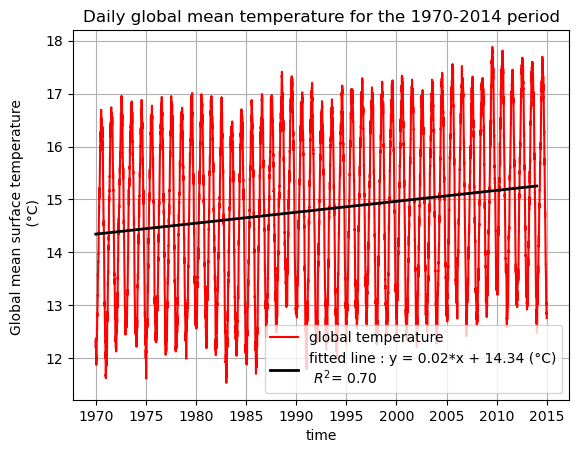

In [13]:
# ================ PLOT THE DAILY GLOBAL MEAN TEMPERATURE TIMESERIES FROM 1970 TO 2014 ================ #

### PREPARE THE DATA ###

## Convert it in °C ##

global_temperature_mean_timeseries_degrees = global_temperature_mean_timeseries - 273.15

### DO THE LINEAR REGRESSION OVER THE YEAR VALUES ###

## Make the yearly average for each year ##

global_temperature_mean_timeseries_yearly_values = global_temperature_mean_timeseries_degrees.groupby('time.year').mean(dim='time')

## Retrieve the datetime format of every year for the plotting ##

years_datetime_format = global_temperature_mean_timeseries.time.sel(time=(global_temperature_mean_timeseries.time.dt.day == 1)*(global_temperature_mean_timeseries.time.dt.month == 1)).values

# it's a bit technical here, we keep only the first januaries by keeping only the first days of every month AND the first month of every year

## Extract the total number of years ##

n_years = np.size(years_datetime_format)

## Generate the years' list ##

years_list = np.arange(n_years)

## Compute the regression parameters

res = stat.linregress(years_list, global_temperature_mean_timeseries_yearly_values.values)

### PLOTTING ###

## Define the figure ##

fig = plt.figure() # define the matplotlib figure

## Plot the daily temperature timeseries ##

global_temperature_mean_timeseries_degrees.plot(label = "global temperature", color = "red")

## Plot the linear regression #

plt.plot(years_datetime_format, res.intercept + res.slope*years_list, 'k', label='fitted line : y = {:.2f}*x + {:.2f} (°C)'.format(res.slope,res.intercept) + '\n $R^{2}$' + '= {:.2f}'.format(res.rvalue**2), linewidth = 2)

## Add some legend through plt ##

# Title #

plt.title("Daily global mean temperature for the 1970-2014 period")

# Legend the y axis #

plt.ylabel("Global mean surface temperature \n (°C)")

# Grid #

plt.grid()

# Legend #

plt.legend()

# Save it 

plt.savefig("/home/jovyan/climate_change_is_real.pdf", format = "pdf")

### All good things must end...

But lucky you, in **your home repository you may find the proof that climate change is real**. I really hope you've enjoyed messing around with notebooks and don't hesitate to ask questions around.

---

Giboni Lucas, first year PhD Student, denying all the responsability for the poor jokes.

Feel free to share, edit and mess around this notebook as you like.

---